In [73]:
import warnings
import pandas as pd
import matplotlib as mpl # 그래프 옵션
import matplotlib.pyplot as plt # 그래프 출력시
import seaborn as sns
from IPython.display import set_matplotlib_formats
warnings.filterwarnings('ignore')
%matplotlib inline 
#그래프 시각화 옵션
mpl.rc('font',family='Malgun Gothic')
#글씨 선명히
set_matplotlib_formats
#음수 처리
mpl.rc('axes',unicode_minus=False)
#matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
table1 = pd.read_csv("./test/201701.csv")
table1.head().T
# column, index, value가 가장 중요
pd.options.display.max_columns=100

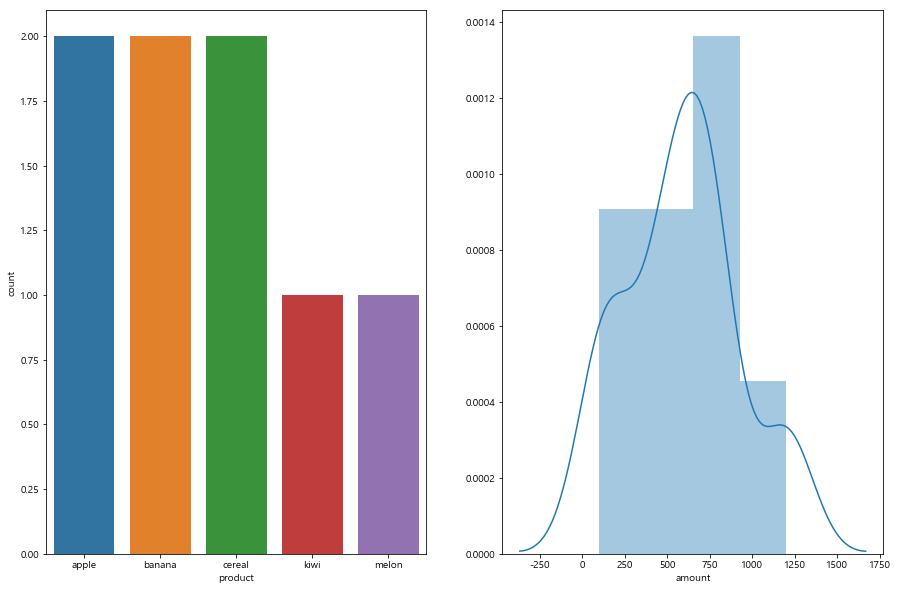

In [2]:
figure, ((ax1,ax2))=plt.subplots(nrows=1,ncols=2)
figure.set_size_inches(15,10)
sns.countplot(table1['product'],ax=ax1)
sns.distplot(table1['amount'],ax=ax2)

# Date

In [3]:
table1['date']

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [4]:
table1['date(clean)'] = pd.to_datetime(table1['date'])
table1

,Name,date,amount,product,result,date(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05
3,Park,2017-01-07,500,cereal,canceled,2017-01-07
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10


In [5]:
table1['date(clean)'].dt.month

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
Name: date(clean), dtype: int64

In [6]:
table1['date(clean)'].dt.weekday_name

0      Sunday
1     Tuesday
2    Thursday
3    Saturday
4      Sunday
5      Monday
6      Monday
7     Tuesday
Name: date(clean), dtype: object

In [7]:
table1['date(month)'] = table1['date(clean)'].dt.month
table1['date(day)'] = table1['date(clean)'].dt.day
table1['date(day_of_week)'] = table1['date(clean)'].dt.weekday_name
table1[['date(month)','date(day)','date(day_of_week)']].head()

,date(month),date(day),date(day_of_week)
0,1,1,Sunday
1,1,3,Tuesday
2,1,5,Thursday
3,1,7,Saturday
4,1,8,Sunday


# Replace

In [8]:
table1['result']

0    confirmed
1    confirmed
2    confirmed
3     canceled
4    confirmed
5    confirmed
6    confirmed
7     canceled
Name: result, dtype: object

In [9]:
table1['result(clean)'] = table1['result'].replace('confirmed','확인').replace('canceled','취소')
table1[['result','result(clean)']]

,result,result(clean)
0,confirmed,확인
1,confirmed,확인
2,confirmed,확인
3,canceled,취소
4,confirmed,확인
5,confirmed,확인
6,confirmed,확인
7,canceled,취소


# Apply
- **DataFrame Handling에 있어서 강력한 함수**

In [10]:
def num(data):
    return data == 'apple'
table1['product'].apply(num)

0     True
1    False
2     True
3    False
4    False
5    False
6    False
7    False
Name: product, dtype: bool

In [11]:
table1.describe().round(2)

,amount,date(month),date(day)
count,8.00,8.0,8.00
mean,587.50,1.0,6.50
std,348.21,0.0,3.21
min,100.00,1.0,1.00
25%,425.00,1.0,4.50
50%,600.00,1.0,7.50
75%,725.00,1.0,9.00
max,1200.00,1.0,10.00


# 범주형(string) 형태로도 기술 가능

In [12]:
table1[['product','result']].describe()

,product,result
count,8,8
unique,5,2
top,cereal,confirmed
freq,2,6


In [13]:
table1[(table1['amount']>200) & (table1['result']=='canceled')]

,Name,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week),result(clean)
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소


In [14]:
a = table1[(table1['amount']>200) & (table1['result']=='canceled')]
table1[a]

ValueError: Must pass DataFrame with boolean values only

# loc

In [16]:
table1['date']

0    2017-01-01
1    2017-01-03
2    2017-01-05
3    2017-01-07
4    2017-01-08
5    2017-01-09
6    2017-01-09
7    2017-01-10
Name: date, dtype: object

In [17]:
table1.loc[3:5][['amount','product']]

,amount,product
3,500,cereal
4,1200,kiwi
5,100,melon


In [18]:
def function1(row):
    return row[0:4]+"년"+row[5:7]+"월"+row[8:]+"일"
def function2(row):
    return row[0:4]+row[5:7]+row[8:]
def info(row):
    print(row.value_counts())
    print(row.describe())
table1[['Name','result','product']].apply(info)

Kang    2
Choi    2
Lee     1
Yoon    1
Kim     1
Park    1
Name: Name, dtype: int64
count        8
unique       6
top       Kang
freq         2
Name: Name, dtype: object
confirmed    6
canceled     2
Name: result, dtype: int64
count             8
unique            2
top       confirmed
freq              6
Name: result, dtype: object
cereal    2
banana    2
apple     2
melon     1
kiwi      1
Name: product, dtype: int64
count          8
unique         5
top       cereal
freq           2
Name: product, dtype: object


Name       None
result     None
product    None
dtype: object

In [19]:
def function3(row):
    if 'a' in row:
        return 'A'
    else:
        return 'B'
table1['product'].apply(function3)

0    A
1    A
2    A
3    A
4    B
5    B
6    A
7    A
Name: product, dtype: object

In [20]:
table1.rename(columns={'Name':'이름'},inplace=True)
table1

,이름,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week),result(clean)
0,Kang,2017-01-01,500,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,1200,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200,cereal,canceled,2017-01-10,1,10,Tuesday,취소


# subplot

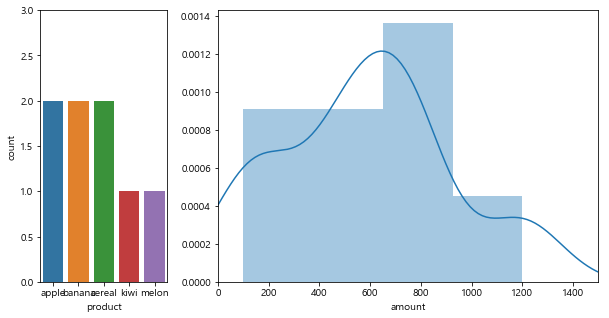

In [21]:
figure, ((ax1,ax2)) = plt.subplots(nrows=1,ncols=2,
                                  gridspec_kw={'width_ratios':[1,3]})
figure.set_size_inches(10,5)
ax1.set_ylim(0,3)
ax2.set_xlim(0,1500)
sns.countplot(table1['product'],ax=ax1)
sns.distplot(table1['amount'],ax=ax2)

# Nan값 설정
- **테이블명.loc[(조건), '값이들어갈colum']='대입할 값'**

In [22]:
import numpy as np
table1.loc[(table1['amount']>1000),'amount']=np.nan
table1

,이름,date,amount,product,result,date(clean),date(month),date(day),date(day_of_week),result(clean)
0,Kang,2017-01-01,500.0,apple,confirmed,2017-01-01,1,1,Sunday,확인
1,Kim,2017-01-03,700.0,banana,confirmed,2017-01-03,1,3,Tuesday,확인
2,Choi,2017-01-05,800.0,apple,confirmed,2017-01-05,1,5,Thursday,확인
3,Park,2017-01-07,500.0,cereal,canceled,2017-01-07,1,7,Saturday,취소
4,Kang,2017-01-08,NaN,kiwi,confirmed,2017-01-08,1,8,Sunday,확인
5,Choi,2017-01-09,100.0,melon,confirmed,2017-01-09,1,9,Monday,확인
6,Lee,2017-01-09,700.0,banana,confirmed,2017-01-09,1,9,Monday,확인
7,Yoon,2017-01-10,200.0,cereal,canceled,2017-01-10,1,10,Tuesday,취소


In [23]:
import sqlite3

In [24]:
connection = sqlite3.connect('./test/DB - Test.db')

In [25]:
query = "SELECT * FROM sqlite_master;"

In [26]:
pd.read_sql_query(query,connection)['sql']

0    CREATE TABLE "order" (\n"timestamp" TEXT,\n  "...
1    CREATE TABLE "good" (\n"goods_id" INTEGER,\n  ...
2    CREATE TABLE "shop" (\n"shop_id" INTEGER,\n  "...
3    CREATE TABLE "log" (\n"timestamp" TEXT,\n  "us...
4    CREATE TABLE "user" (\n"user_id" TEXT,\n  "os"...
Name: sql, dtype: object

In [27]:
query = "SELECT * FROM 'user' "
user = pd.read_sql(query, connection)
print(user.shape)
user.head()

(10000, 3)


,user_id,os,age
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41
1,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31
2,-1de9sT-MLwVVvnC0ncCLnqEqpSi3XSN,iOS,16
3,-3A3L2jnM55B_Q1bRXMjZ6sPnINIj-Y1,And,41
4,-3bhcSgPOIdQAPkPNcchxvECGqGQQ78k,And,42


In [28]:
query = "SELECT * FROM 'log' "
log = pd.read_sql(query, connection)
print(log.shape)
log.head()

(105815, 6)


,timestamp,user_id,event_origin,event_name,event_goods_id,event_shop_id
0,2018-06-11 00:00:00.213,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_ranking,app_page_view,NaN,NaN
1,2018-06-11 00:00:00.810,lwFZ77v_ygk0uU40t1ud3l30EZ6sE2R3,shops_bookmark,app_page_view,NaN,NaN
2,2018-06-11 00:00:00.956,mR-bO6hC9g-m8ERXMRQZaRwJFvzNNdd8,goods_search_result/로브,app_page_view,NaN,NaN
3,2018-06-11 00:00:01.084,K1d8_t3-QIskaSkrx32oAFu856D8JmLo,shops_bookmark,app_page_view,NaN,NaN
4,2018-06-11 00:00:01.561,Yjny5AchUWLiuv4kdeq50COF-S8OFXPd,shops_bookmark,app_page_view,NaN,NaN


# merge

In [29]:
user.shape

(10000, 3)

In [30]:
log.shape

(105815, 6)

In [31]:
pd.merge(user,log).head()

,user_id,os,age,timestamp,event_origin,event_name,event_goods_id,event_shop_id
0,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,2018-06-11 15:57:10.615,shops_bookmark,app_page_view,NaN,NaN
1,--PYPMX8QWg0ioT5zfORmU-S5Lln0lot,And,41,2018-06-11 15:59:05.505,shops_bookmark,app_page_view,NaN,NaN
2,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,2018-06-11 00:55:37.309,my_goods,app_page_view,NaN,NaN
3,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,2018-06-11 00:55:44.430,my_goods,enter_browser,2506.0,40.0
4,-16-xXbeDcvkZJtTpRwMi57Yo2ZQpORv,iOS,31,2018-06-11 01:00:33.295,my_goods,app_page_view,NaN,NaN


In [32]:
t1 = pd.merge(user,log)
t1.shape

(105815, 8)

In [33]:
t2 =pd.merge(user,log,how='outer')
t2.shape

(105906, 8)

In [34]:
t3 = pd.merge(user,log,how='left')
t3.shape

(105906, 8)

In [35]:
t4 = pd.merge(user,log,how='right')
t4.shape

(105815, 8)

# Url

In [36]:
url = 'http://bitly.kr/yKYiM'
data1 = pd.read_csv(url)

In [37]:
data1.head()

,Unnamed: 0,idNum,date,problem,MDC,citationIssued,personSearch,vehicleSearch,preRace,race,gender,lat,long,policePrecinct,neighborhood
0,6823,17-000003,2017-01-01 00:00:42,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Unknown,44.966617,-93.246458,1,Cedar Riverside
1,6824,17-000007,2017-01-01 00:03:07,suspicious,MDC,NaN,NO,NO,Unknown,Unknown,Male,44.980450,-93.271340,1,Downtown West
2,6825,17-000073,2017-01-01 00:23:15,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.948350,-93.275380,5,Whittier
3,6826,17-000092,2017-01-01 00:33:48,suspicious,MDC,NaN,NO,NO,Unknown,East African,Male,44.948360,-93.281350,5,Whittier
4,6827,17-000098,2017-01-01 00:37:58,traffic,MDC,NaN,NO,NO,Unknown,White,Female,44.979078,-93.262076,1,Downtown West


# countplot

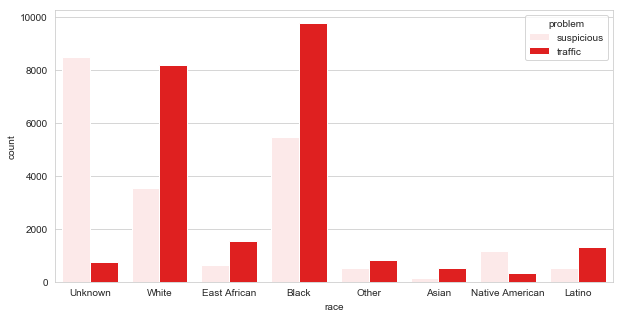

In [52]:
plt.figure(figsize=[10,5])
sns.countplot(data = data1, x='race',hue='problem',color='r')

- **whitegrid / darkgrid / dark / white/ ticks**

In [47]:
sns.set_style('whitegrid')

# color palette

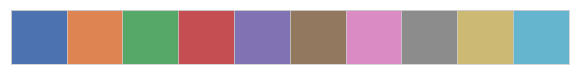

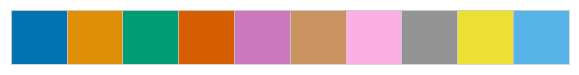

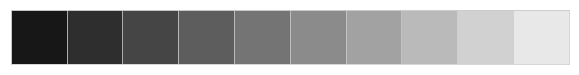

In [55]:
sns.palplot(sns.color_palette("deep",10))
sns.palplot(sns.color_palette("colorblind",10))
sns.palplot(sns.color_palette("gray",10))

<Figure size 432x288 with 0 Axes>

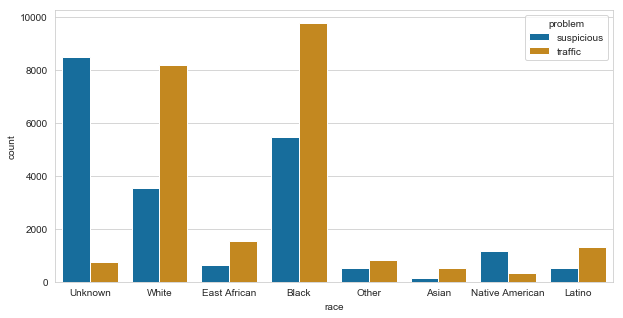

In [64]:
plt.figure(figsize=[10,5])
sns.countplot(data = data1, x='race',hue='problem',color='g',palette=sns.color_palette("colorblind",10))

# 글씨가 그래프 사이에 겹칠때

In [63]:
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

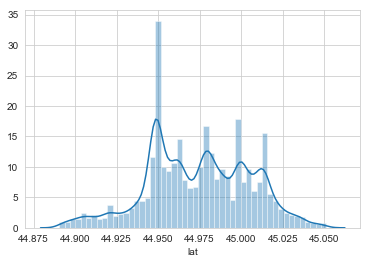

In [69]:
# 바 제거 : hist=False
# 곡선 제거 : kde=False
sns.distplot(data1['lat'],hist=True,kde=True)

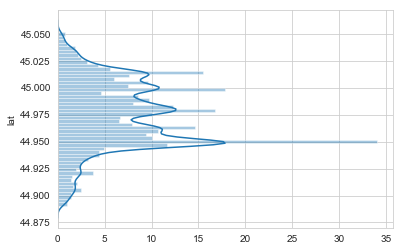

In [70]:
sns.distplot(data1['lat'],vertical=True)

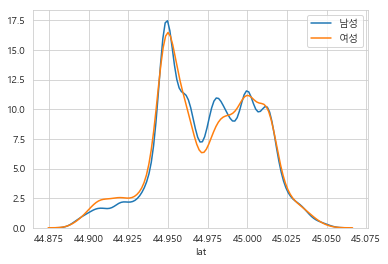

In [74]:
one = data1[data1['gender'] == 'Male']
two = data1[data1['gender'] == 'Female']

sns.distplot(one['lat'], label = '남성',hist=False)
sns.distplot(two['lat'], label = '여성',hist=False)
plt.legend()

# Bar plot
- **y축에 연속형 변수가 있어야함**

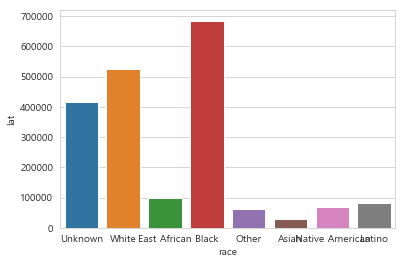

In [77]:
# y축에 축 범위 설정해주기
# plt.ylim([44.88,45]) # 특정 범위들에서 그래프 설정
sns.barplot(data=data1, x='race',y='lat',estimator=sum)
# estimator = sum : 각 항목별 합 , defult 는 평균값

# line plot / point plot

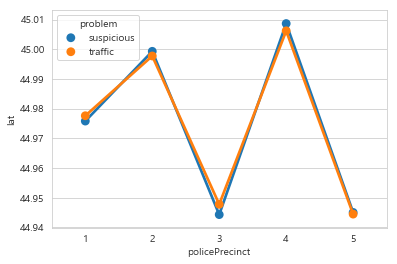

In [81]:
sns.pointplot(data=data1, x='policePrecinct',y='lat',hue = 'problem') 
# hue = problem 각 문제 항목에 대해 개형을 볼 수 있게해줌
# 예를 들어 성병에 따라서 보고 싶을 때

In [82]:
fmri = sns.load_dataset('fmri')

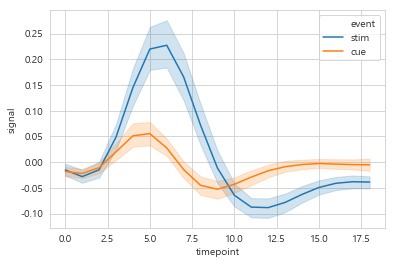

In [85]:
sns.lineplot(data=fmri,x='timepoint',y='signal',hue='event')

# Box plot

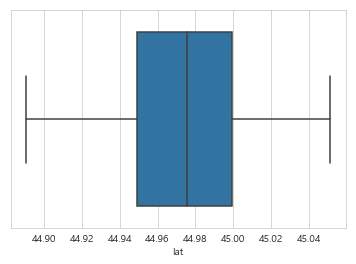

In [86]:
sns.boxplot(data=data1,x='lat')

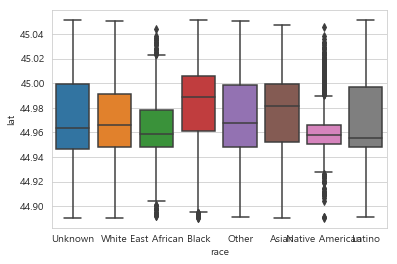

In [88]:
sns.boxplot(data=data1,x='race',y='lat')

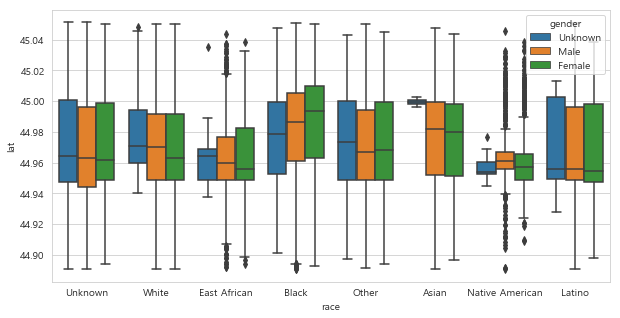

In [91]:
plt.figure(figsize=[10,5])
sns.boxplot(data=data1,x='race',y='lat',hue='gender')

# Violinplot
- **그래프의 개형을 산포로 같이 볼 수 있다**

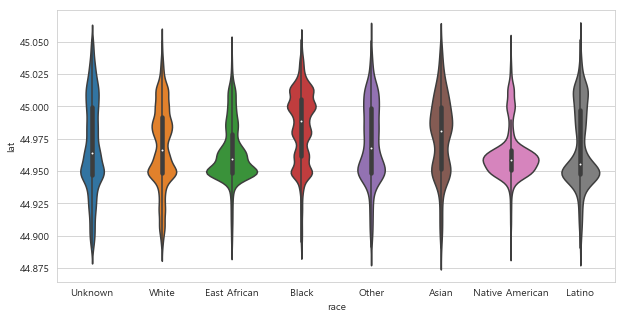

In [95]:
plt.figure(figsize=[10,5])
sns.violinplot(data=data1,x='race',y='lat')

# Scatter plot

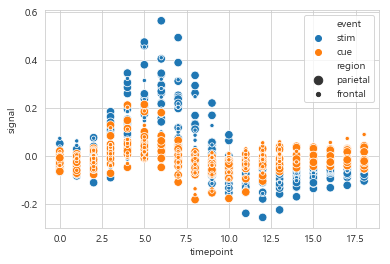

In [98]:
sns.scatterplot(data=fmri,x='timepoint',y='signal', hue = 'event',size='region')